In [1]:
DOWNLOAD_WORDS = False

In [2]:
!pip install wordcloud seaborn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from all_libs_ml import *
import seaborn as sns
from wordcloud import WordCloud

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
#set this variable to true if you are using light mode, or false if you are using dark mode.
JUPYTER = False
RANDOM_STATE = 42

In [5]:
DATA_PATH = "../smaller_dataset/yelp coffee/raw_yelp_review_data_processed.csv"
BASE_FILE_NAME = "chunk_"
FILE_FORMAT = ".csv"
RANDOM_STATE = 42

### 1.1 Data Sourcing and Munging

#### 1.1.1 Utility Functions

In [6]:
review_data = pd.read_csv(DATA_PATH)

In [7]:
review_data.isnull().sum()

coffee_shop_name    0
full_review_text    0
star_rating         0
str_sent            0
sent_polarity       0
dtype: int64

In [8]:
review_data.dropna(inplace = True)

In [9]:
review_data['full_review_text'].replace('', np.nan, inplace=True)
review_data.dropna(inplace = True)

In [10]:
# Extract unique words from the text data
unique_words = set(' '.join(review_data['full_review_text']).split())

Text(0, 0.5, 'Word')

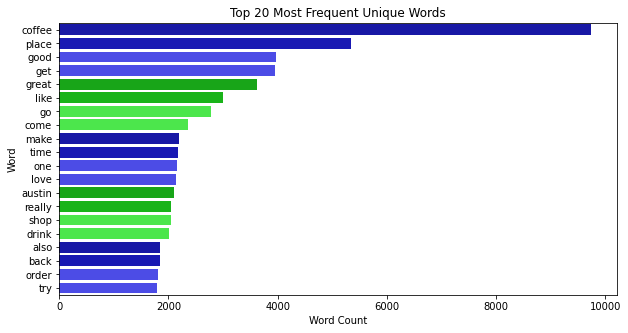

In [11]:
# Count the number of occurrences of each unique word and create a bar chart of the top 20 most frequent unique words
unique_word_count = review_data['full_review_text'].str.split(expand=True).stack().value_counts()
top_unique_words = unique_word_count.loc[unique_word_count.index.isin(unique_words)].head(20)

colors = ['b', 'g'] 
shades = [0.37, 0.4, 0.6, 0.6]
palette = [sns.set_hls_values(color, l=s) for color in colors for s in shades]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_unique_words.values, y=top_unique_words.index,palette=palette)
plt.title('Top 20 Most Frequent Unique Words')
plt.xlabel('Word Count')
plt.ylabel('Word')

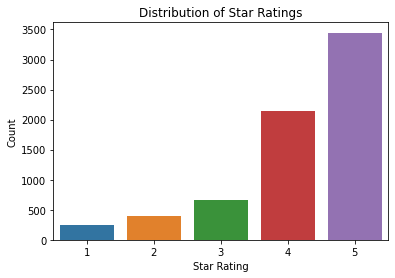

In [12]:
# Create a countplot of the star ratings using Seaborn
sns.countplot(x=review_data['star_rating'])

# Add some labels and titles
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Distribution of Star Ratings')

# Show the plot
plt.show()

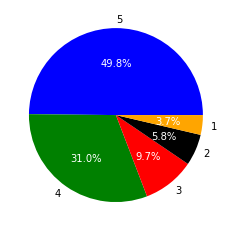

In [13]:
# Using a pieplot to visualize the star ratings
labels_dict = dict(review_data['star_rating'].value_counts())
_, _, autotexts = plt.pie(labels_dict.values(),colors = ['blue','green','red','black','orange'],labels=labels_dict.keys(),textprops={'color':'black'},autopct= '%1.1f%%')
for autotext in autotexts:
    autotext.set_color('white')

In [14]:
word_lengths = review_data['full_review_text'].str.split().apply(lambda x: [len(word) for word in x])

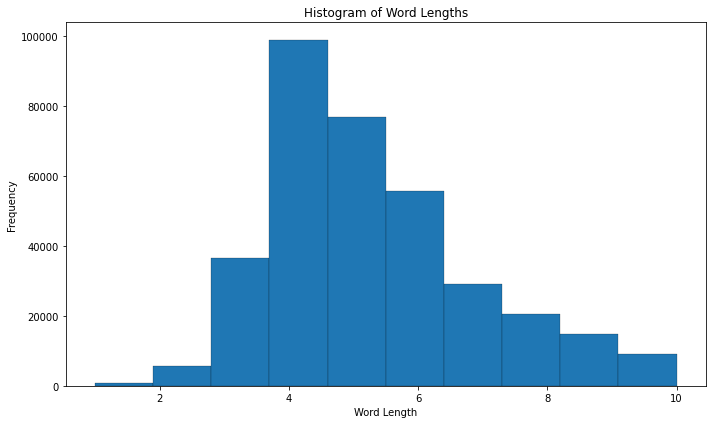

In [15]:
# Creating a Histogram of word lengths
word_lengths = review_data['full_review_text'].str.split().apply(lambda x: [len(word) for word in x])
word_lengths = [length for sublist in word_lengths for length in sublist]
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=10, range=[1, 10], lw=0.2, edgecolor='black')
plt.title('Histogram of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

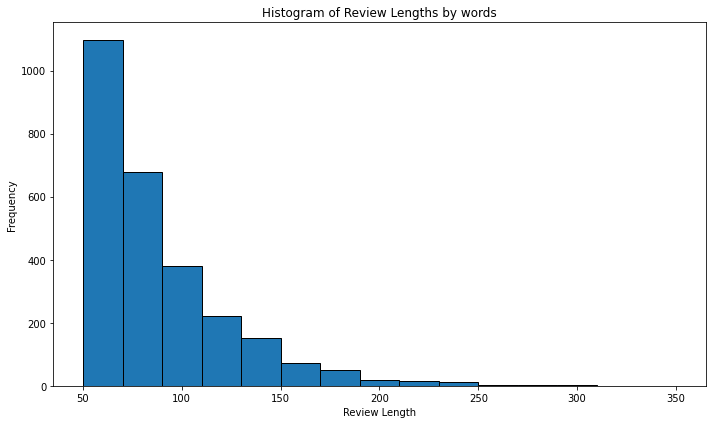

In [16]:
# Creating a Histogram of review lengths
review_lengths = [len(text.split()) for text in review_data['full_review_text']]
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=15, range=[50, 350], edgecolor='black')
plt.title('Histogram of Review Lengths by words')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [17]:
word_sentiments = []

In [18]:
word_frequencies = {'Positive': {}, 'Negative': {}, 'Neutral': {}}

In [19]:
words_count_total = []
for text in review_data['full_review_text']:
    words_count_total.extend(text.split())

In [20]:
sid = SentimentIntensityAnalyzer()
sent_polarity_words = [sid.polarity_scores(word) for word in words_count_total]

In [21]:
sid.polarity_scores("not good")

{'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.3412}

In [22]:
for i,word in enumerate(words_count_total):
    if sent_polarity_words[i]['compound'] > 0:
        word_sentiments.append((word, 'Positive'))
    elif sent_polarity_words[i]['compound'] < 0:
        word_sentiments.append((word, 'Negative'))       
    else:
        word_sentiments.append((word, 'Neutral'))

In [23]:
for word, sentiment in word_sentiments:
    if word in word_frequencies[sentiment].keys():
        word_frequencies[sentiment][word] += 1
    else:
        word_frequencies[sentiment][word] = 1

In [24]:
sent_counts = [0,0,0]

In [25]:
for sentiment,words in word_frequencies.items():
    sent = 0 if sentiment == 'Positive' else 1 if sentiment == 'Negative' else 2
    for _,count in words.items():
        sent_counts[sent] += count

In [26]:
sent_counts

[52919, 10001, 290578]

In [27]:
len(unique_words) == sent_counts[0] + sent_counts[1] + sent_counts[2]

False

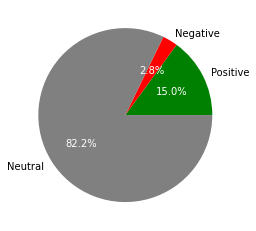

In [28]:
_, _, autotexts = plt.pie(sent_counts,colors = ['green','red','gray',],labels = ['Positive','Negative','Neutral'],autopct= '%1.1f%%')
for autotext in autotexts:
    autotext.set_color('white')

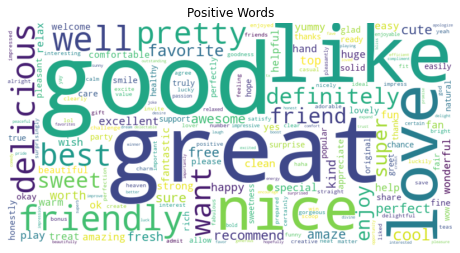

In [29]:
# Generate word cloud for positive sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white',random_state = RANDOM_STATE).fit_words(word_frequencies['Positive'])

# Plot the positive word cloud
plt.figure(figsize=(8, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words')
plt.show()

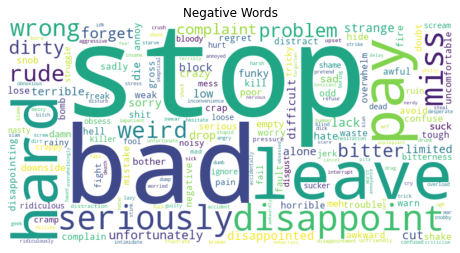

In [30]:
# Generate word cloud for negative sentiment
negative_wordcloud = WordCloud(width=800, height=400, background_color='white',random_state = RANDOM_STATE).fit_words(word_frequencies['Negative'])

# Plot the negative word cloud
plt.figure(figsize=(8, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words')
plt.show()

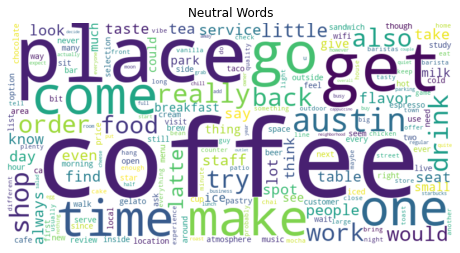

In [31]:
# Generate word cloud for neutral sentiment
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white',random_state = RANDOM_STATE).fit_words(word_frequencies['Neutral'])

# Plot the neutral word cloud
plt.figure(figsize=(8, 6))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Words')
plt.show()